# Set Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install ultralytics==8.0.134 opencv-python==4.8.0.74 roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.1/107.7 GB disk)


# Download custom dataset from roboflow

Dataset Link: https://universe.roboflow.com/smart-football-object-detection/smart-football-object-detection

In [ ]:
https://universe.roboflow.com/ds/xyesEbLvep?key=2LroZ1BOMH


In [ ]:
from roboflow import Roboflow

# Crear una instancia de Roboflow
rf = Roboflow()

# Descargar el conjunto de datos desde la URL proporcionada
rf.download_dataset(url="https://universe.roboflow.com/ds/xyesEbLvep?key=2LroZ1BOMH", save_dir="/content")

# Nota: Reemplaza "/ruta/donde/guardar" con la ruta de tu directorio local donde deseas guardar el conjunto de datos descargado.


RuntimeError: API Key is of Incorrect Type 
 Expected Type: <class 'str'>
 Input Type: <class 'NoneType'>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LUclFYDNc01bfUMtPM5H")
project = rf.workspace("smart-football-object-detection").project("smart-football-object-detection")
# version = project.version(11)
# dataset = version.download("tensorflow")
dataset = project.version(11).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.134, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Smart-Football:-Object-Detection-11 in yolov8:: 100%|██████████| 25634/25634 [00:07<00:00, 3388.17it/s]


In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="***")
# project = rf.workspace("smart-football-object-detection").project("smart-football-object-detection")
# dataset = project.version(11).download("yolov8")

In [ ]:
dataset.location


'/content/datasets/Smart-Football:-Object-Detection-11'

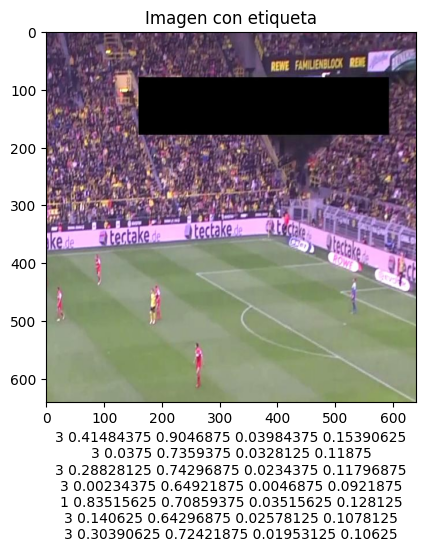

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen que deseas visualizar
image_path = "/content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.3236d2a32881d864c3fd34cf18cde938.jpg"

# Ruta de la etiqueta de la imagen

label_path = "/content/datasets/Smart-Football:-Object-Detection-11/test/labels/0a2d9b_0_frame0012_png.rf.3236d2a32881d864c3fd34cf18cde938.txt"

# Carga la imagen
image = cv2.imread(image_path)

# Lee las etiquetas
with open(label_path, 'r') as file:
    label = file.read()

# Muestra la imagen y su etiqueta
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen con etiqueta")
plt.xlabel(label)  # Agrega la etiqueta como texto en el eje X
plt.show()

In [ ]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))


GPU disponible: []


In [ ]:
dataset.location

NameError: name 'dataset' is not defined

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=500 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Smart-Football:-Object-Detection-11/data.yaml, epochs=3, patience=50, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nm

In [ ]:
38 min en 5 epochs

In [1]:
pip install inference-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00


In [3]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="LUclFYDNc01bfUMtPM5H"
)

result = CLIENT.infer('/content/sample_data/a.jpg', model_id="smart-football-object-detection/11")

In [6]:
import matplotlib.pyplot as plt


In [9]:
print(result)

{'time': 0.6860079900002347, 'image': {'width': 640, 'height': 640}, 'predictions': [{'x': 264.0, 'y': 577.0, 'width': 24.0, 'height': 98.0, 'confidence': 0.7979052066802979, 'class': 'soccer-player', 'class_id': 3, 'detection_id': 'c80d1554-d0df-4dac-bc0c-90c4c4f85a6a'}, {'x': 25.0, 'y': 471.5, 'width': 22.0, 'height': 75.0, 'confidence': 0.7866732478141785, 'class': 'soccer-player', 'class_id': 3, 'detection_id': 'f38ad754-54d2-419b-8543-450f0f83af49'}, {'x': 91.5, 'y': 410.5, 'width': 17.0, 'height': 67.0, 'confidence': 0.7497459650039673, 'class': 'soccer-player', 'class_id': 3, 'detection_id': '28f75fd4-20ec-4ffd-b3ef-1faaad97a465'}, {'x': 532.5, 'y': 457.0, 'width': 23.0, 'height': 80.0, 'confidence': 0.7497413754463196, 'class': 'goalkeeper', 'class_id': 1, 'detection_id': '25cb9208-89f4-4378-919b-8b514f6577d4'}, {'x': 184.0, 'y': 475.0, 'width': 16.0, 'height': 72.0, 'confidence': 0.6448159217834473, 'class': 'soccer-player', 'class_id': 3, 'detection_id': '12ef8bda-327f-4216-9

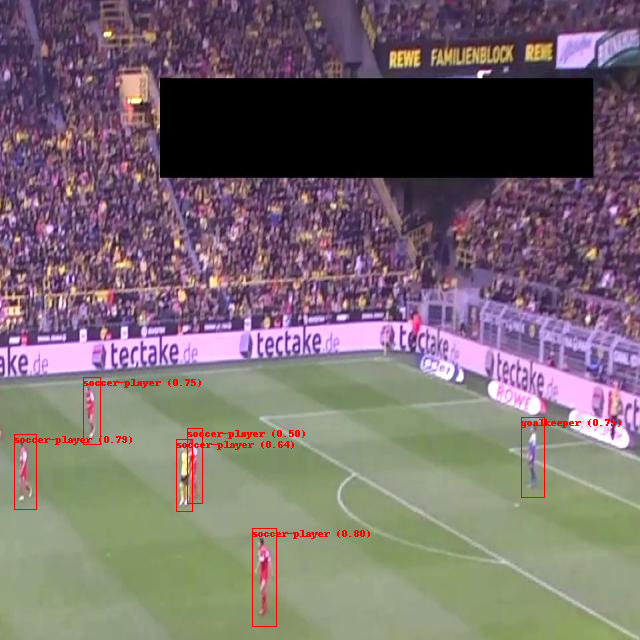

In [17]:
from PIL import Image, ImageDraw

# Abrir la imagen original
image_path = '/content/sample_data/a.jpg'
image = Image.open(image_path)

# Crear un objeto ImageDraw para dibujar en la imagen
draw = ImageDraw.Draw(image)

# Iterar sobre las detecciones y dibujar las cajas delimitadoras y etiquetas
for prediction in result['predictions']:
    x = prediction['x']
    y = prediction['y']
    width = prediction['width']
    height = prediction['height']
    label = prediction['class']
    confidence = prediction['confidence']

    # Calcular las coordenadas de las esquinas de la caja delimitadora
    x1 = x - width / 2
    y1 = y - height / 2
    x2 = x + width / 2
    y2 = y + height / 2

    # Dibujar la caja delimitadora
    draw.rectangle([x1, y1, x2, y2], outline='red')

    # Escribir la etiqueta y la confianza
    draw.text((x1, y1), f'{label} ({confidence:.2f})', fill='red')

# Mostrar la imagen con las detecciones superpuestas
image


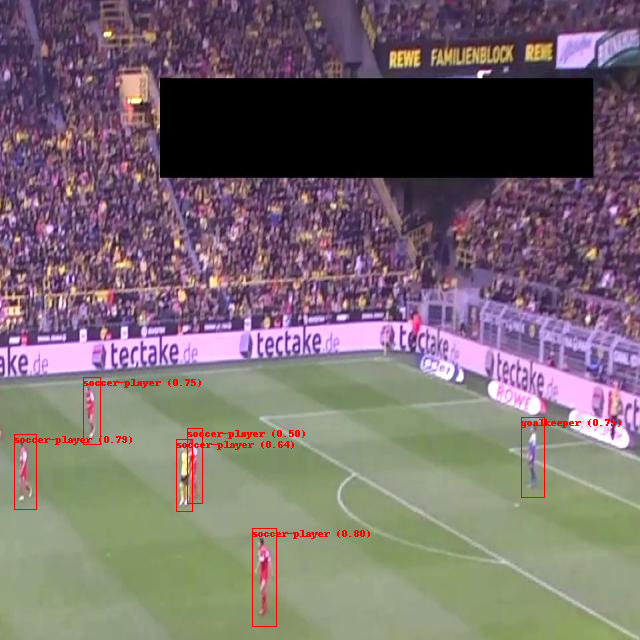

In [16]:
image